In [6]:
import csv
import numpy as np
from scipy.integrate import quad
from numpy import *
from scipy import *
from scipy.integrate import fixed_quad
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
linestyle_str = [
    ('solid', 'solid'),
    ('dotted', '.'),    
    ('dashed', '--'),  
    ('dashdot', '-.')] 
from matplotlib.pyplot import *
from  matplotlib import *
import mplhep as hep 
hep.style.use(hep.style.ATLAS)
plt.rc('text', usetex=True)
plt.rc('font', family='Times New Roman')
%matplotlib inline
mpl.rcParams['figure.figsize'] = (10,6)
import matplotlib.patheffects as pe


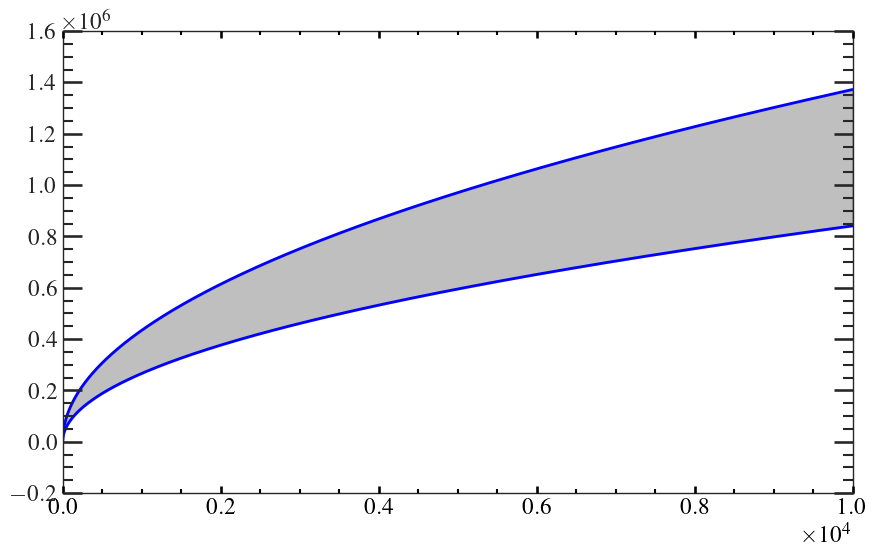

In [7]:
m_mu = 0.105  # Muon mass
gs1 = 2
gp1 = 0
delta_a_up = (38 + 63) * 10**-11
delta_a_central = (38) * 10**-11

points_up = []
points_central = []

#Pointsup
for i in range(10000):
    mE = i 
    epsilon = mE / m_mu
    Pp = lambda x: gs1**2 * x**2 * (1 - x + epsilon)
    Pm = lambda x: gp1**2 * x**2 * (1 - x - epsilon)
    integrand = lambda x: -(Pm(x) + Pp(x) - 8 * np.pi**2 * x * delta_a_up * (-1 + x + epsilon**2)) / (-1 + x)
    M_phi2_value, _ = fixed_quad(integrand, 0, 1, n=1000)
    M_phi2 = m_mu**2 / (8 * np.pi**2 * delta_a_up) * M_phi2_value
    M_phi = np.sqrt(M_phi2) if M_phi2 >= 0 else np.nan
    points_up.append((mE, M_phi))

df_up = pd.DataFrame(points_up, columns=['mE', 'M_phi'])
df_up.to_csv('points_up.csv', index=False)

#Pointscentral
for i in range(10000):
    mE = i 
    epsilon = mE / m_mu
    Pp = lambda x: gs1**2 * x**2 * (1 - x + epsilon)
    Pm = lambda x: gp1**2 * x**2 * (1 - x - epsilon)
    integrand = lambda x: -(Pm(x) + Pp(x) - 8 * np.pi**2 * x * delta_a_central * (-1 + x + epsilon**2)) / (-1 + x)
    M_phi2_value, _ = fixed_quad(integrand, 0, 1, n=1000)
    M_phi2 = m_mu**2 / (8 * np.pi**2 * delta_a_central) * M_phi2_value
    M_phi = np.sqrt(M_phi2) if M_phi2 >= 0 else np.nan
    points_central.append((mE, M_phi))

df_central = pd.DataFrame(points_central, columns=['mE', 'M_phi'])
df_central.to_csv('../Data/points_central.csv', index=False)

# Plotting
x_vals_up, y_vals_up = zip(*points_up)
x_vals_central, y_vals_central = zip(*points_central)

plt.plot(x_vals_up, y_vals_up, color='blue', linewidth=2, label='ΔaZp up')
plt.plot(x_vals_central, y_vals_central, color='blue', linewidth=2, label='ΔaZp central')
plt.fill_between(x_vals_up, y_vals_up, y_vals_central, color='gray', alpha=0.5)
plt.show()


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def compute_delta(x, mE, mPhi):
    epsilon = mE / m_mu
    Pp = gs1**2 * x**2 * (1 + epsilon - x)
    Pm = gp1**2 * x**2 * (1 - epsilon - x)
    lam = m_mu / mPhi
    D = (8 * np.pi**2) * (((1 - x) * (-x * lam**2 + 1)) + (x * lam**2 * epsilon**2))
    return (lam**2) * (Pp + Pm) / D

m_mu = 0.105
gs1 = 2
gp1 = gs1


results = []

for mE in range(10000):
    # 1000 values between 0 and 500
    mPhis = np.random.uniform(0, 500, 1000)
    
    for mPhi in mPhis:
        delta_value, _ = fixed_quad(compute_delta, 0, 1, args=(mE, mPhi), n=1000)
        if delta_a_central <= delta_value <= delta_a_up:
            results.append((mE, mPhi, delta_value))

df = pd.DataFrame(results, columns=['mE', 'mPhi', 'delta'])
df.to_csv('../Data/selected_points.csv', index=False)


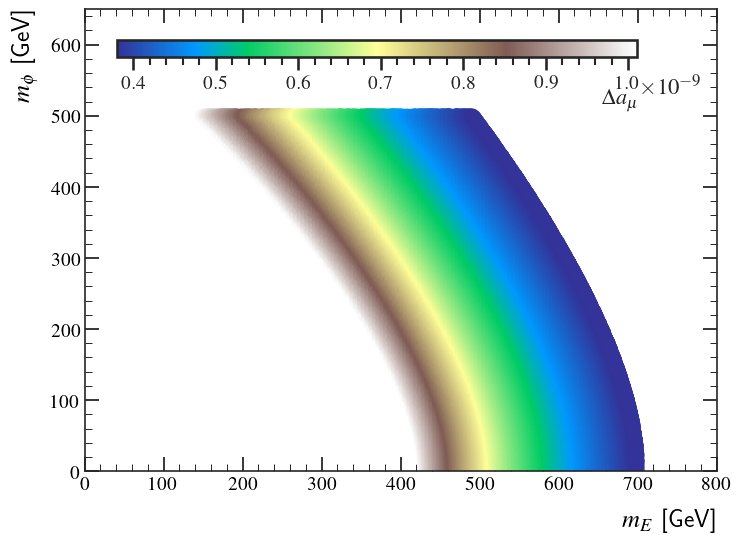

In [9]:
import seaborn as sns
df = pd.read_csv('../Data/selected_points.csv')

mpl.rcParams['font.family'] = 'Times New Roman'
sns.set_theme(context='talk', style='white')
fig, ax = plt.subplots(figsize=(8, 6))
sc =plt.scatter(df['mE'], df['mPhi'], c=df['delta'], cmap='terrain')
cax = fig.add_axes([0.2, 0.85, 0.65, 0.028])  # left, bottom, width, height
cbar = plt.colorbar(sc, cax=cax, orientation='horizontal')
cbar.set_label('$\Delta a_{\mu}$', size=16, labelpad=-2.2)  
cbar.ax.tick_params(labelsize=14)

yaxis = cbar.ax.xaxis  
offset = yaxis.get_offset_text()
offset.set_position((1.13, 0)) 
offset.set_va('bottom')

ax.set_xlabel('$ m_E$ [GeV]', size=18, color='black')
ax.set_ylabel('$m_{\phi}$ [GeV]', size=18, color='black')
ax.tick_params(axis='x', labelcolor='black', labelsize=14)
ax.tick_params(axis='y', labelcolor='black', labelsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.set_xlim([0,800])
ax.set_ylim([0,650])

ax.tick_params(direction='in', length=10, width=1.1, colors='black', which='major', top=True, right=True)
ax.tick_params(direction='in', length=5, width=0.6, colors='black', which='minor', top=True, right=True)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')

for spine in ['left', 'right', 'top', 'bottom']:
    ax.spines[spine].set_linewidth(1.2)

#sns.despine(left=False, bottom=False, right=False, top=False, offset=None, trim=False)
#plt.tight_layout() 
fig.savefig('../Figures/mEmphi2.png', dpi=300, bbox_inches='tight')  
plt.show()
